In [1]:
import pandas as pd
import numpy as np
import sklearn.utils
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

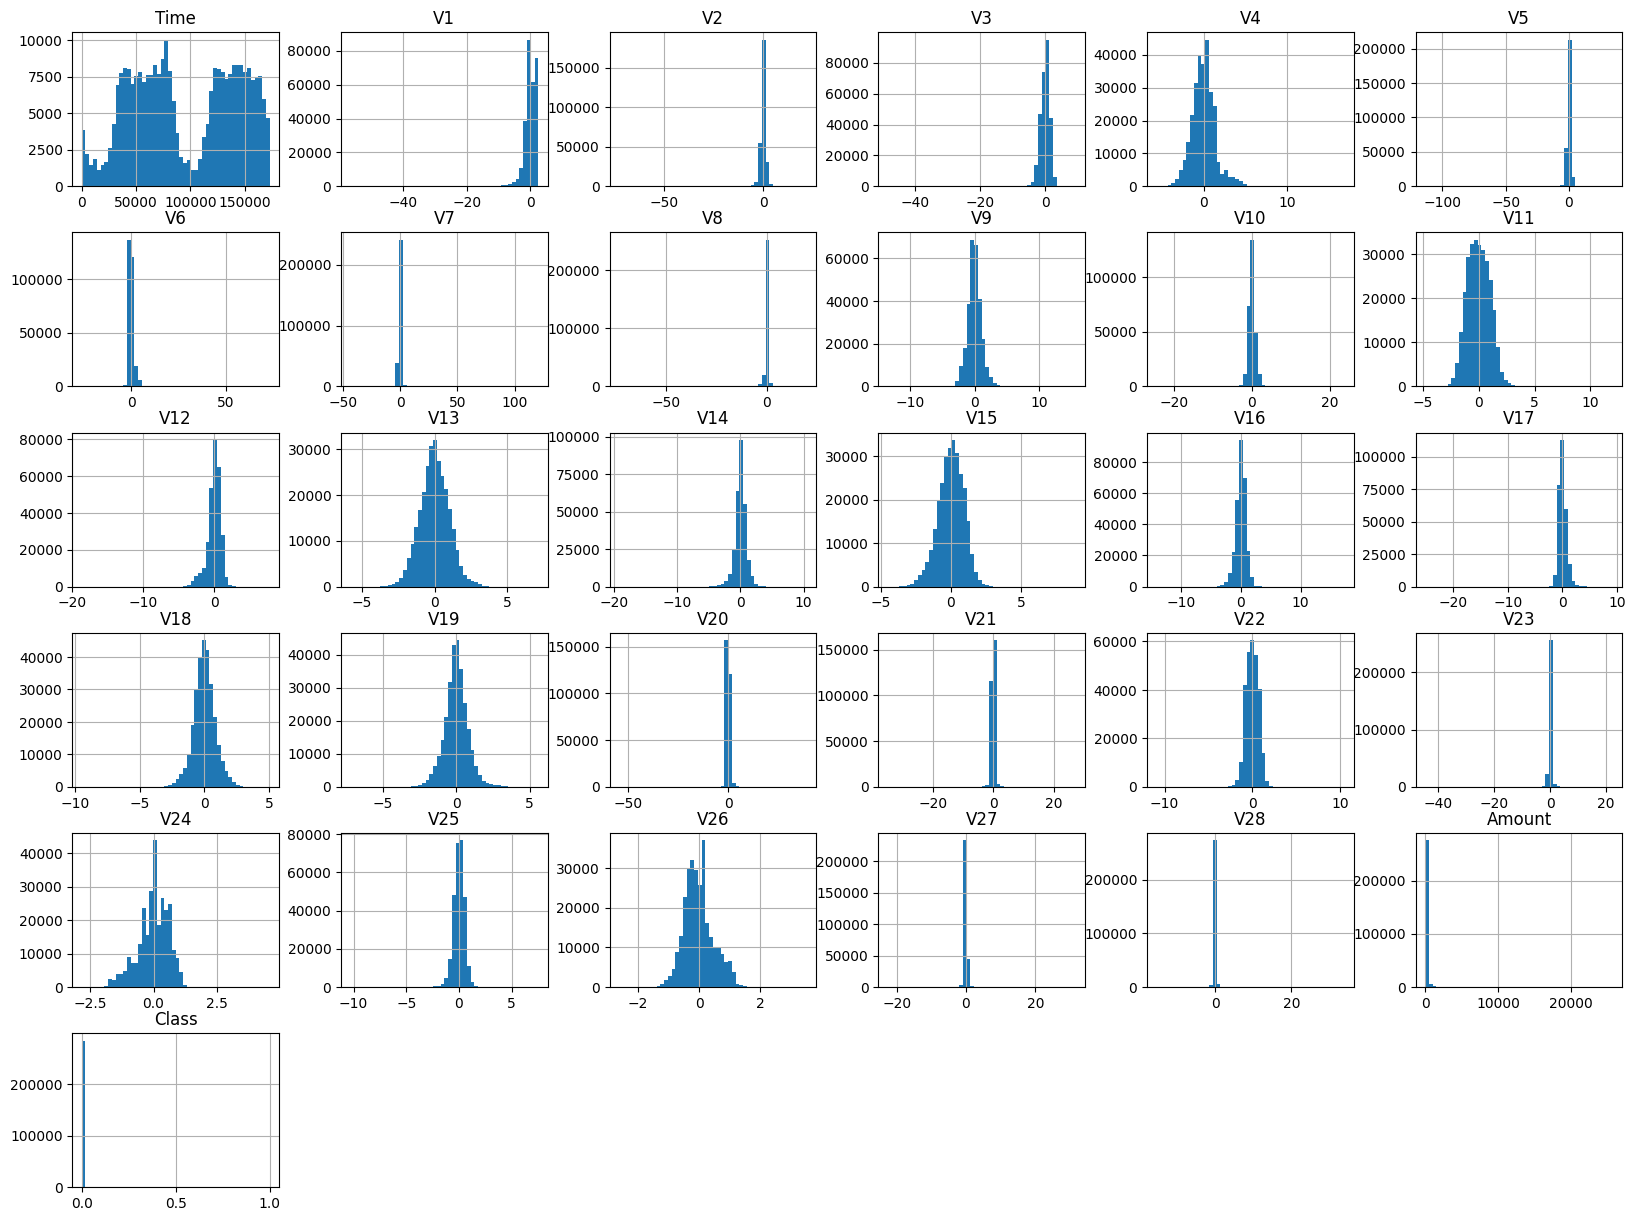

In [4]:
df.hist(bins=50,figsize=(20,15))

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Time represents seconds elapsed from the first transaction. It might not be useful

df = df.drop(['Time'], axis=1)


In [7]:
# Amount has outliers. Use RobustScaler:
scaler = RobustScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df = df.drop(['Amount'], axis=1)


In [8]:
# Check for Nulls and Duplicates
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows: ", df.duplicated().sum())

# Drop duplicates if necessary
df = df.drop_duplicates()



Missing values:
 V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
Amount_scaled    0
dtype: int64
Duplicate rows:  9144


Class
0    0.998284
1    0.001716
Name: proportion, dtype: float64


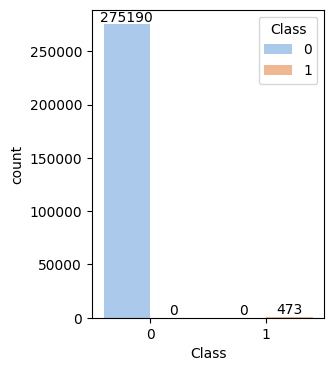

In [9]:
print(df['Class'].value_counts(normalize=True))
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df,hue='Class', palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y, #Keeps the fraud/non-fraud ratio intact.
    random_state=42
)


In [12]:
# Check original class distribution
from collections import Counter
print("Original class distribution in training set:")
print(Counter(y_train))

Original class distribution in training set:
Counter({0: 220152, 1: 378})


### Upsampling(SMOTE)

In [17]:
# # Completely uninstall existing versions
# !pip uninstall -y scikit-learn imbalanced-learn

# # Install compatible versions (as of May 2025, these are stable together)
# !pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0 --quiet



Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.3.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [19]:
# # Install compatible versions (as of May 2025, these are stable together)
# !pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0 --quiet

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)


In [14]:
# Check new class distribution
print("\nAfter SMOTE oversampling:")
print(Counter(y_train_upsampled))


After SMOTE oversampling:
Counter({0: 220152, 1: 220152})


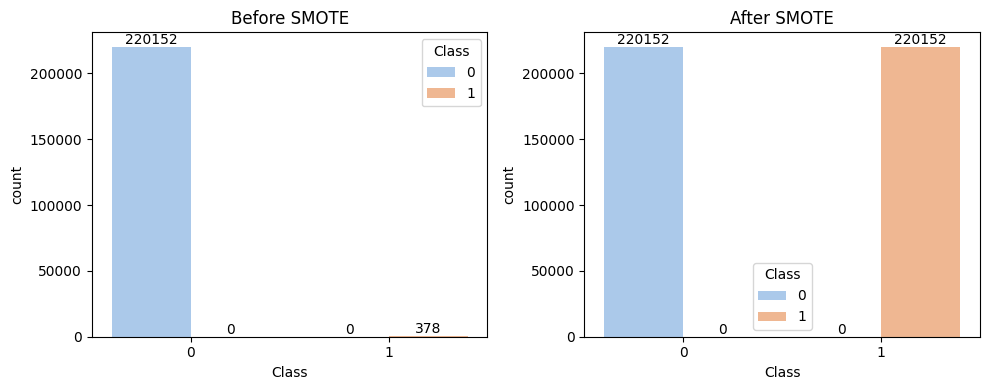

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=y_train, ax=ax[0], hue=y_train, palette="pastel") 
ax[0].set_title("Before SMOTE")
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize=10)

sns.countplot(x=y_train_upsampled, ax=ax[1], hue=y_train_upsampled, palette="pastel")
ax[1].set_title("After SMOTE")
for container in ax[1].containers:
    ax[1].bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()


### Undersampling(Random)

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

undersampler = RandomUnderSampler(random_state=42)

In [18]:
X_train_downsampled, y_train_downsampled = undersampler.fit_resample(X_train, y_train)

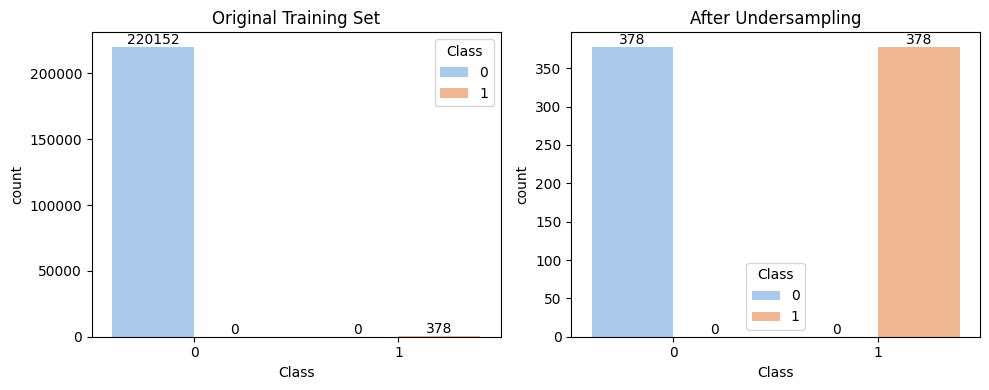

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=y_train, ax=ax[0], palette="pastel",  hue=y_train)
ax[0].set_title("Original Training Set")
for container in ax[0].containers:
    ax[0].bar_label(container)

sns.countplot(x=y_train_downsampled, ax=ax[1], palette="pastel",hue=y_train_downsampled)
ax[1].set_title("After Undersampling")
for container in ax[1].containers:
    ax[1].bar_label(container)

plt.tight_layout()
plt.show()


In [21]:
!pip install lightgbm --upgrade --quiet


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def train_and_evaluate(X_train, y_train, X_test, y_test, model_name='xgboost'):
    if model_name == 'xgboost':
        model = XGBClassifier(
            tree_method='hist',    # Use histogram algorithm
            device='cuda',         # GPU acceleration
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )
    elif model_name == 'lightgbm':
        model = LGBMClassifier(
            device='gpu',
            boosting_type='gbdt',
            random_state=42
        )
    else:
        raise ValueError("Unsupported model")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n--- {model_name.upper()} Results ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


In [31]:
# Dataset 1: Original
print("Original Dataset")
train_and_evaluate(X_train, y_train, X_test, y_test, model_name='xgboost')

# Dataset 2: SMOTE
print("Upsampled Dataset")
train_and_evaluate(X_train_upsampled, y_train_upsampled, X_test, y_test, model_name='xgboost')

# Dataset 3: Undersampled
print("Undersampled Dataset")
train_and_evaluate(X_train_downsampled, y_train_downsampled, X_test, y_test, model_name='xgboost')


Original Dataset

--- XGBOOST Results ---
Confusion Matrix:
 [[55033     5]
 [   25    70]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.93      0.74      0.82        95

    accuracy                           1.00     55133
   macro avg       0.97      0.87      0.91     55133
weighted avg       1.00      1.00      1.00     55133

Upsampled Dataset

--- XGBOOST Results ---
Confusion Matrix:
 [[55005    33]
 [   21    74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.69      0.78      0.73        95

    accuracy                           1.00     55133
   macro avg       0.85      0.89      0.87     55133
weighted avg       1.00      1.00      1.00     55133

Undersampled Dataset

--- XGBOOST Results ---
Confusion Matrix:
 [[52657  2381]
 [    9    86]]
Classification Re

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def plot_pr_curve(y_true, y_pred_prob, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

def train_and_evaluate(X_train, y_train, X_test, y_test, model_name='xgboost'):
    if model_name == 'xgboost':
        model = XGBClassifier(
            tree_method='hist',    # Use histogram algorithm
            device='cuda',         # GPU acceleration
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )
    elif model_name == 'lightgbm':
        model = LGBMClassifier(
            device='gpu',
            boosting_type='gbdt',
            random_state=42
        )
    else:
        raise ValueError("Unsupported model")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

    # Plot ROC and PR Curve
    plot_roc_curve(y_test, y_pred_prob, model_name)
    plot_pr_curve(y_test, y_pred_prob, model_name)

    print(f"\n--- {model_name.upper()} Results ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Original Dataset


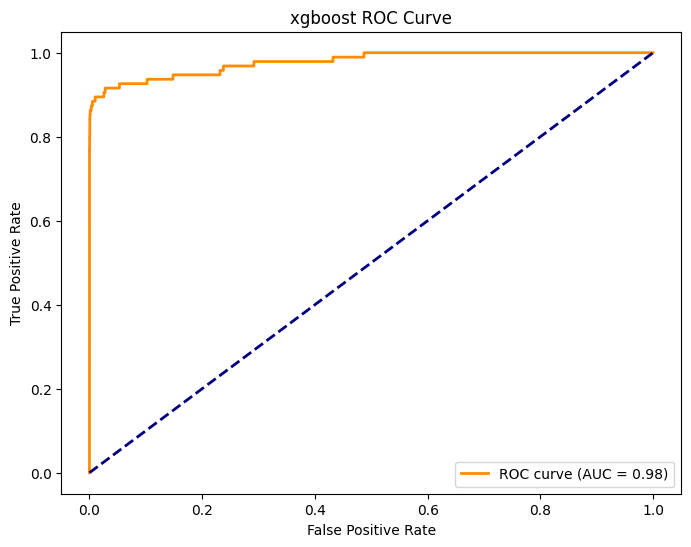

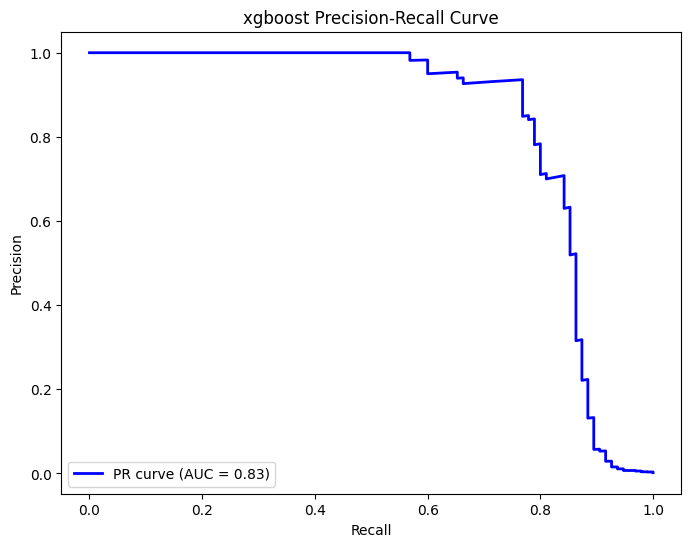


--- XGBOOST Results ---
Confusion Matrix:
 [[55033     5]
 [   25    70]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.93      0.74      0.82        95

    accuracy                           1.00     55133
   macro avg       0.97      0.87      0.91     55133
weighted avg       1.00      1.00      1.00     55133

Upsampled Dataset


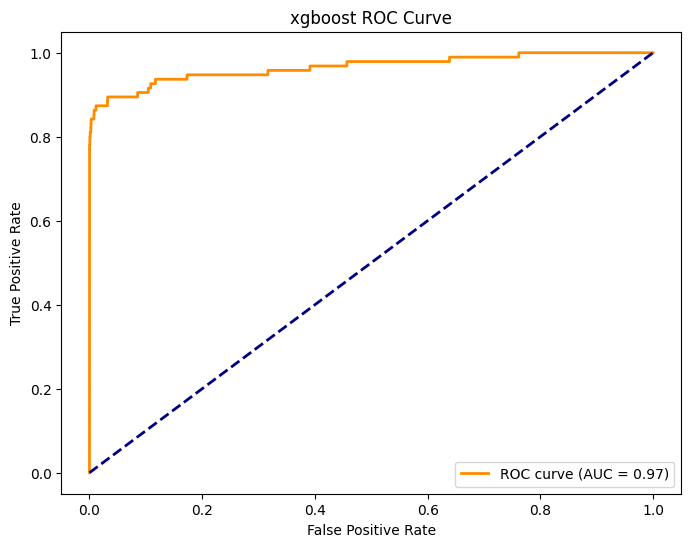

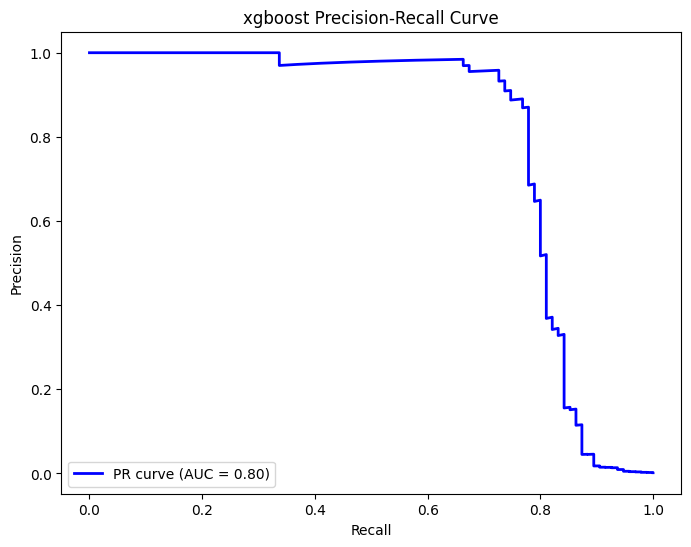


--- XGBOOST Results ---
Confusion Matrix:
 [[55005    33]
 [   21    74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.69      0.78      0.73        95

    accuracy                           1.00     55133
   macro avg       0.85      0.89      0.87     55133
weighted avg       1.00      1.00      1.00     55133

Undersampled Dataset


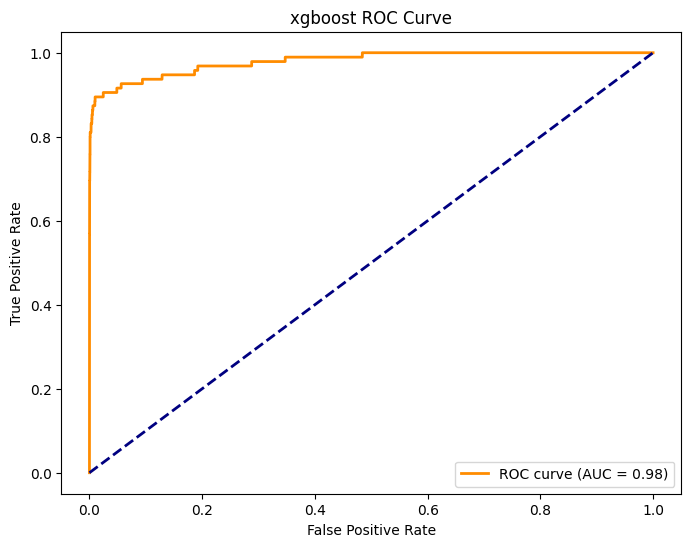

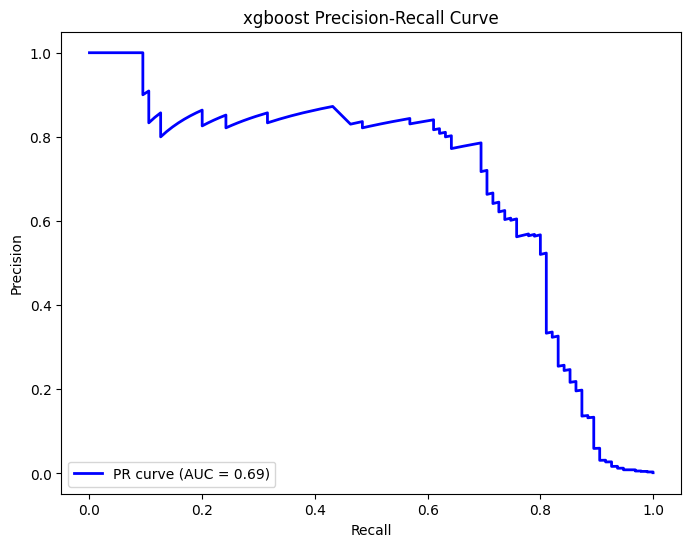


--- XGBOOST Results ---
Confusion Matrix:
 [[52657  2381]
 [    9    86]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     55038
           1       0.03      0.91      0.07        95

    accuracy                           0.96     55133
   macro avg       0.52      0.93      0.52     55133
weighted avg       1.00      0.96      0.98     55133



In [33]:
# Call the function for each dataset and model
print("Original Dataset")
train_and_evaluate(X_train, y_train, X_test, y_test, model_name='xgboost')

print("Upsampled Dataset")
train_and_evaluate(X_train_upsampled, y_train_upsampled, X_test, y_test, model_name='xgboost')

print("Undersampled Dataset")
train_and_evaluate(X_train_downsampled, y_train_downsampled, X_test, y_test, model_name='xgboost')


Original Dataset - LightGBM
[LightGBM] [Info] Number of positive: 378, number of negative: 220152
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 220530, number of used features: 29
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (6.73 MB) transferred to GPU in 0.007696 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001714 -> initscore=-6.367179
[LightGBM] [Info] Start training from score -6.367179


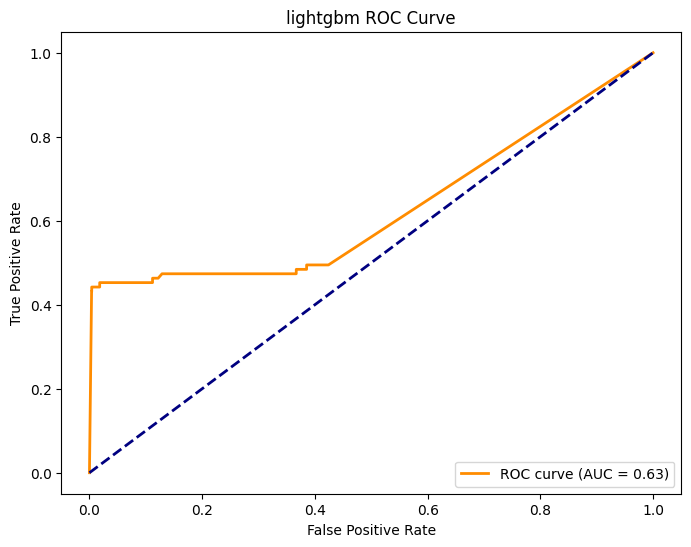

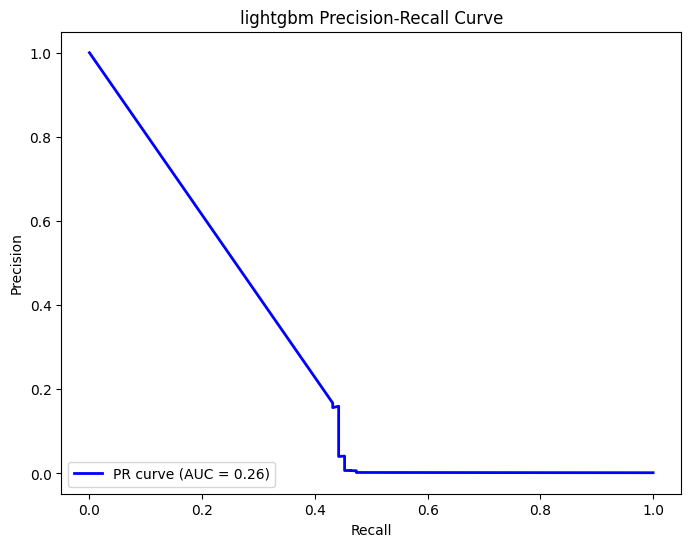


--- LIGHTGBM Results ---
Confusion Matrix:
 [[54793   245]
 [   53    42]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.15      0.44      0.22        95

    accuracy                           0.99     55133
   macro avg       0.57      0.72      0.61     55133
weighted avg       1.00      0.99      1.00     55133

Upsampled Dataset - LightGBM
[LightGBM] [Info] Number of positive: 220152, number of negative: 220152
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 440304, number of used features: 29
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (13.44 MB) transf

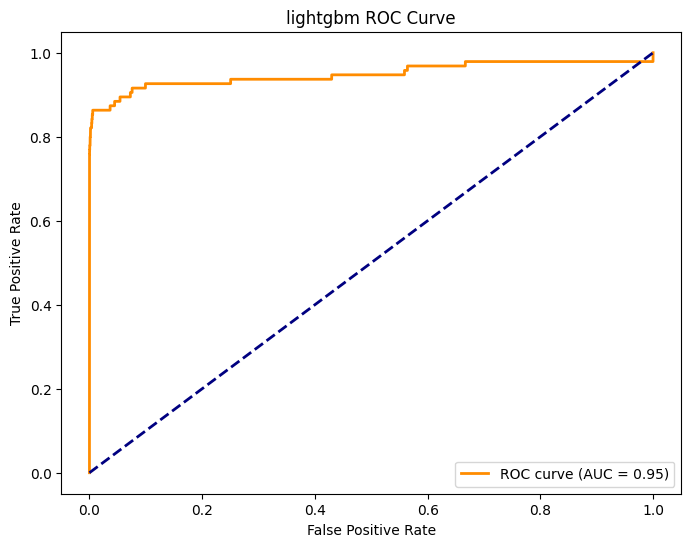

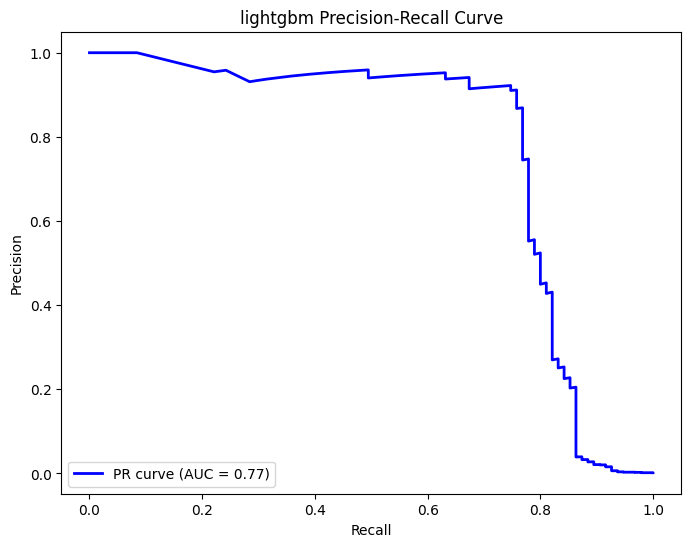


--- LIGHTGBM Results ---
Confusion Matrix:
 [[54972    66]
 [   20    75]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.53      0.79      0.64        95

    accuracy                           1.00     55133
   macro avg       0.77      0.89      0.82     55133
weighted avg       1.00      1.00      1.00     55133

Undersampled Dataset - LightGBM
[LightGBM] [Info] Number of positive: 378, number of negative: 378
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7308
[LightGBM] [Info] Number of data points in the train set: 756, number of used features: 29
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (0.02 MB) transferred t

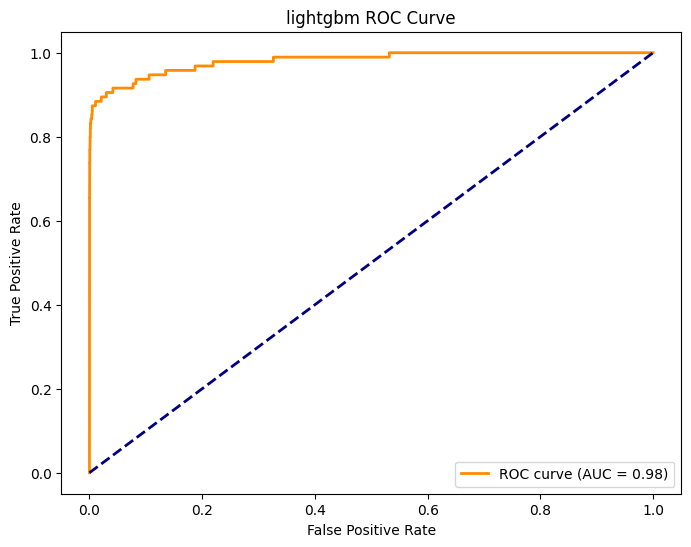

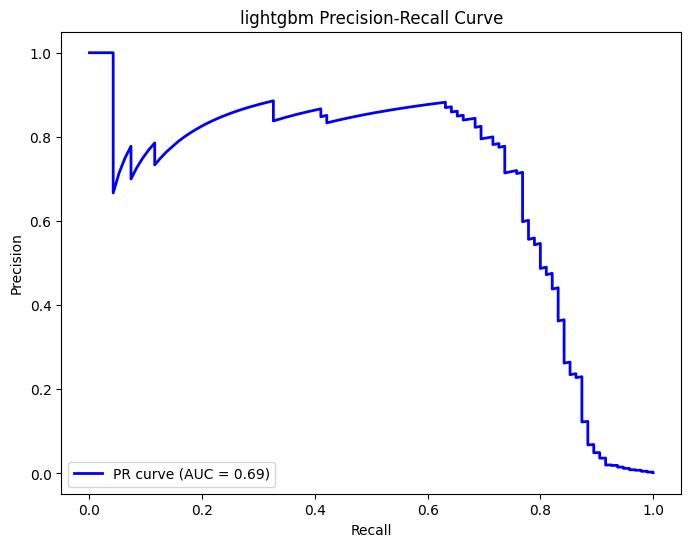


--- LIGHTGBM Results ---
Confusion Matrix:
 [[52973  2065]
 [    9    86]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     55038
           1       0.04      0.91      0.08        95

    accuracy                           0.96     55133
   macro avg       0.52      0.93      0.53     55133
weighted avg       1.00      0.96      0.98     55133



In [34]:

# Now for LightGBM
print("Original Dataset - LightGBM")
train_and_evaluate(X_train, y_train, X_test, y_test, model_name='lightgbm')

print("Upsampled Dataset - LightGBM")
train_and_evaluate(X_train_upsampled, y_train_upsampled, X_test, y_test, model_name='lightgbm')

print("Undersampled Dataset - LightGBM")
train_and_evaluate(X_train_downsampled, y_train_downsampled, X_test, y_test, model_name='lightgbm')

In [36]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

def train_and_evaluate_nn(X_train, y_train, X_test, y_test, val_split=0.2):
    # Split training data further into training and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=val_split, random_state=42, stratify=y_train)

    # Create a simple neural network model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))  # To prevent overfitting
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    # Train the model with validation data and early stopping
    model.fit(X_train_split, y_train_split, epochs=50, batch_size=32, validation_data=(X_val_split, y_val_split), 
              callbacks=[early_stopping], verbose=1)

    # Predict on the test data
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Print confusion matrix and classification report
    print("\n--- Neural Network Results ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Dataset 1: Original
print("Original Dataset")
train_and_evaluate_nn(X_train, y_train, X_test, y_test)

# Dataset 2: SMOTE Upsampled
print("Upsampled Dataset")
train_and_evaluate_nn(X_train_upsampled, y_train_upsampled, X_test, y_test)

# Dataset 3: Undersampled
print("Undersampled Dataset")
train_and_evaluate_nn(X_train_downsampled, y_train_downsampled, X_test, y_test)


Original Dataset
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5514/5514 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9982 - loss: 0.0200 - val_accuracy: 0.9992 - val_loss: 0.0046
Epoch 2/50
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0050
Epoch 3/50
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9992 - val_loss: 0.0045
Epoch 4/50
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 5/50
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 6/50
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9992 - val_loss: 0.0041
Epoch 7/50
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9992 - val_loss: 0.0041
Epoch 8/50
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accura

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11008/11008 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9742 - loss: 0.0734 - val_accuracy: 0.9985 - val_loss: 0.0066
Epoch 2/50
11008/11008 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9980 - loss: 0.0076 - val_accuracy: 0.9994 - val_loss: 0.0037
Epoch 3/50
11008/11008 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 0.9991 - val_loss: 0.0044
Epoch 4/50
11008/11008 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 5/50
11008/11008 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 6/50
11008/11008 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 7/50
11008/11008 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 8/50
11008/11008 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.7319 - loss: 0.5090 - val_accuracy: 0.9211 - val_loss: 0.3002
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8792 - loss: 0.2925 - val_accuracy: 0.9276 - val_loss: 0.2342
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9216 - loss: 0.2434 - val_accuracy: 0.9342 - val_loss: 0.2038
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9163 - loss: 0.2243 - val_accuracy: 0.9342 - val_loss: 0.1950
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9397 - loss: 0.1709 - val_accuracy: 0.9276 - val_loss: 0.1851
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1386 - val_accuracy: 0.9211 - val_loss: 0.1941
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.1491 - val_accuracy: 0.9276 - val_loss: 0.1817
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9283 - loss: 0.1718 - val_accuracy: 0.9276 - val_loss: 0.1830
Ep

**XGBClassifier** with **Random Downsampling** performed best

In [37]:
from xgboost import XGBClassifier
import joblib

# Train on downsampled data
model = XGBClassifier(
    tree_method='hist',
    device='cuda',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train_downsampled, y_train_downsampled)

# Save the trained model
joblib.dump(model, 'xgboost_fraud_downsampled.pkl')
print("✅ Model saved as xgboost_fraud_downsampled.pkl")


✅ Model saved as xgboost_fraud_downsampled.pkl


In [38]:
# Load the model
model = joblib.load('xgboost_fraud_downsampled.pkl')

# Predict on new/unseen data
y_pred = model.predict(X_test)  # or any user input

# Example: single prediction
# single_pred = model.predict([new_transaction_features])


In [39]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[52657  2381]
 [    9    86]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     55038
           1       0.03      0.91      0.07        95

    accuracy                           0.96     55133
   macro avg       0.52      0.93      0.52     55133
weighted avg       1.00      0.96      0.98     55133



In [41]:
from sklearn.preprocessing import RobustScaler
# Save the fitted scaler
joblib.dump(scaler, 'robust_scaler.pkl')


['robust_scaler.pkl']